In [1]:
import numpy as np
import matplotlib.pylab as plt
import random as rn

In [2]:
# Position
x0 = 0
xf = np.array([-15, 15])
xobs = [[-14, -13], [-6, -5.5], [4, 5.5], [10, 11.5]]


In [3]:
# General RRT Settings
K = 100
tMax = 10
vmax = 1

In [4]:
# Obstacle Setting
# [start, close, open]
obs1 = [0, 5, 2]
obs2 = [0, 4, 1]
obs3 = [0, 6, 3.5]
obs4 = [0, 4, 3]
obs_vec = [obs1, obs2, obs3, obs4]

def obstacle_check(trand, obs):
    temp = trand - obs[0]
    tempt = np.mod(temp, obs[1]+obs[2])
    if tempt >= obs[1] and tempt <= (obs[1]+obs[2]):
        # Not Caught
        return True
    else:
        # Caught
        return False 

print(obstacle_check(7, obs3))

True


In [5]:
def distance(a, b):
    return b - a

In [6]:
def random_sample():
    trand = rn.uniform(1e-1, tMax)
    """sign = 0
    if rn.random() < 0.5:
        sign = 1
    else:
        sign = -1
    xrand = sign*rn.uniform(0, trand*vmax+x0)"""
    xrand = rn.uniform(trand*(-vmax)+x0, trand*vmax+x0)
    qrand = [xrand, trand]
    return qrand

In [7]:
def validate(q2):
    check_vec = []
    for i in range(len(xobs)):
        if q2[0] >= xobs[i][0] and q2[0] <= xobs[i][1]:
            if obstacle_check(q2[1], obs_vec[i]):
                check_vec.append(0)
            else:
                check_vec.append(1)
        else:
            check_vec.append(0)
    return check_vec

In [8]:
def check_route(qclosest, qnew):
    route_check = []
    div = 10000
    tspace = np.linspace(0, 1, div)
    for t in tspace:
        xmove = (qnew[0]-qclosest[0])/div*t
        tmove = (qnew[1]-qclosest[1])/div*t
        qcheck = [qclosest[0]+xmove, qclosest[1]+tmove]
        check_vec = validate(qcheck)

        if np.sum(check_vec) == 0:
            route_check.append(0)
        else:
            return False

    if np.sum(route_check) == 0:
        return True # No Path Collision
    else:
        return False # Path Collision

In [9]:
def reachable(q0, q1):
    dx = np.abs(q1[0]-q0[0])
    dt = q1[1]-q0[1]
    if dx == 0:
        return True
    else:
        if dt > 0 and np.abs(dx/dt) <= vmax:
            return True
        else:
            return False

In [10]:
def find_neighbor(qrand, V):
    # Find neighbor
    dist_vec = []
    for i in range(len(V)):
        if reachable(V[i], qrand):
            dist_vec.append(distance(V[i][0], qrand[0]))
    if len(dist_vec) > 0:
        closest = dist_vec.index(min(dist_vec))
        qclosest = V[closest]
        return qclosest
    else:
        return None

In [11]:
def extend(qclosest, q1):
    dx = q1[0]-qclosest[0]
    dt = q1[1]-qclosest[1]
    norm = np.sqrt(dx**2 + dt**2)
    dxnorm = dx/norm*vmax
    dtnorm = dt/norm*vmax
    #qnew = [qclosest[0]+dxnorm*vmax, qclosest[1]+dtnorm*vmax]
    qnew = [qclosest[0]+dxnorm, qclosest[1]+dtnorm]
    return qnew

In [12]:
# Standard RRT
k = 0
V_RRT = []
V_RRT.append([x0, 0])
V_RRT_raw = []
T_RRT = []
T_RRT.append(0)
E_RRT = []
sanity = []
path_RRT = None
while k < K:
    print('k: ', k)
    while 1:
        # Sample
        qrand = random_sample()
        qclosest = find_neighbor(qrand, V_RRT)
        if qclosest is not None:
            qnew = extend(qclosest, qrand)
            
            # Validate
            check_vec = validate(qnew)
            if np.sum(check_vec) == 0:
                if check_route(qclosest, qnew):
                    break

    # Add V, E
    k += 1
    #print('qrand: ', qrand)
    #print('qnew: ', qnew)
    V_RRT.append(qnew)
    sanity.append(qrand)
    V_RRT_raw.append(qrand)
    E_RRT.append([qclosest, qnew])
    T_RRT.append(qnew[1])

    # Check continue
    dist_check = []
    for i in range(len(xf)):
        if np.abs(distance(xf[i], qnew[0])) <= 1:
            dist_check.append(1)
        else:
            dist_check.append(0)
    if np.sum(dist_check) > 0 or k > K:
        end_cond = dist_check.index(1)
        dist_to_fin = distance(xf[i], qnew[0])
        qfin = [xf[end_cond], qnew[1]+np.abs(dist_to_fin/vmax)]
        V_RRT.append(qfin)
        E_RRT.append([qnew, qfin])
        break

print(len(V_RRT))

k:  0
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49
k:  50
k:  51
k:  52
k:  53
k:  54
k:  55
k:  56
k:  57
k:  58
k:  59
k:  60
k:  61
k:  62
k:  63
k:  64
k:  65
k:  66
k:  67
k:  68
k:  69
k:  70
k:  71
k:  72
k:  73
k:  74
k:  75
k:  76
k:  77
k:  78
k:  79
k:  80
k:  81
k:  82
k:  83
k:  84
k:  85
k:  86
k:  87
k:  88
k:  89
k:  90
k:  91
k:  92
k:  93
k:  94
k:  95
k:  96
k:  97
k:  98
k:  99
101


Text(0, 0.5, 't')

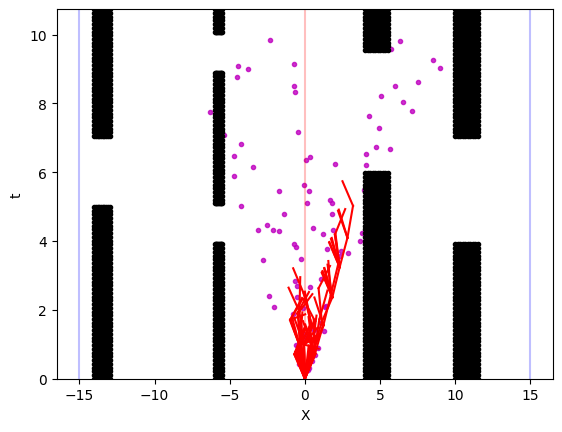

In [13]:
fig = plt.figure()
ax = fig.subplots()
# RRT
#for rrtv in V_RRT:
    #plt.plot(rrtv[0], rrtv[1], 'm.')
for rrtvrnd in V_RRT_raw:
    plt.plot(rrtvrnd[0], rrtvrnd[1], 'm.', alpha=0.8)
for rrte in E_RRT:
    plt.plot([rrte[0][0], rrte[1][0]], [rrte[0][1], rrte[1][1]], 'r-')#, alpha=0.25)

# Obstacle
tspace = np.linspace(0, max(T_RRT)+5, 100)
for xobsi in range(len(xobs)):
    xobs_this = xobs[xobsi]
    xspace = np.linspace(xobs_this[0], xobs_this[1], 10)
    for xi in xspace:
        for ti in tspace:
            if not obstacle_check(ti, obs_vec[xobsi]):
                plt.plot(xi, ti, 'k.')#, alpha=0.25)

# Initial/Final
plt.plot([x0, x0], [0, max(T_RRT)+5], 'r-', alpha=0.25)
for i in range(len(xf)):
    plt.plot([xf[i], xf[i]], [0, max(T_RRT)+5], 'b-', alpha=0.25)

# Plot Limits
#plt.xlim(xf[0]-1, xf[1]+1)
plt.ylim(0, max(T_RRT)+5)
plt.xlabel('X')
plt.ylabel('t')

In [14]:
# Save files
save = False

if save:
    import pickle
            
    RRT = {}
    RRT['V'] = V_RRT
    RRT['E'] = E_RRT
    RRT['T'] = T_RRT

    with open("RRT", "wb") as fp:   #Pickling
        pickle.dump(RRT, fp)

In [15]:
def neighbors(q0, V_RRTstar):
    prox = [2.5, 2.5] # [x, t]
    output = []
    for v in V_RRTstar:
        if 0 <= q0[0]-v[0] <= prox[0] and 0 <= q0[1]-v[1] <= prox[1] and reachable(v, q0):
            output.append(v)
    return output

In [16]:
# Stardard RRT*
k = 0
V_RRTstar = []
V_RRTstar.append([x0, 0])
T_RRTstar = []
T_RRTstar.append(0)
E_RRTstar = []
while k < K:
    print('k: ', k)
    while 1:
        # Sample
        qrand = random_sample()
        qclosest = find_neighbor(qrand, V_RRTstar)
        if qclosest is not None:
            qnew = extend(qclosest, qrand)
            
            # Validate
            check_vec = validate(qnew)
            if np.sum(check_vec) == 0:
                if check_route(qclosest, qnew):
                    break

    # Add V, E
    k += 1
    V_RRTstar.append(qnew)
    E_RRTstar.append([qclosest, qnew])
    T_RRTstar.append(qnew[1])

    # Rewiring
    if k > 1:
        qmin = qclosest
        cost_old = np.sqrt((qclosest[0]-qnew[0])**2+(qclosest[1]-qnew[1])**2)
        neighbor_vector = neighbors(qnew, V_RRTstar)
        if len(neighbor_vector) > 0:
            for v in neighbor_vector:
                if cost_old+np.sqrt((v[0]-qnew[0])**2+(v[1]-qnew[1])**2) < np.sqrt((qclosest[0]-v[0])**2+(qclosest[1]-v[1])**2):
                    cost_old = cost_old+np.sqrt((v[0]-qnew[0])**2+(v[1]-qnew[1])**2)
                    qmin = v
            E_RRTstar.append([qnew, qmin])

    # Check continue
    dist_check = []
    for i in range(len(xf)):
        if np.abs(distance(xf[i], V_RRTstar[-1][0])) <= 1:
            dist_check.append(1)
        else:
            dist_check.append(0)
    if np.sum(dist_check) > 0 or k > K:
        end_cond = dist_check.index(1)
        dist_to_fin = distance(xf[i], qnew[0])
        qfin = [xf[end_cond], qnew[1]+np.abs(dist_to_fin/vmax)]
        V_RRTstar.append(qfin)
        E_RRTstar.append([qnew, qfin])
        break

print(len(V_RRTstar))

k:  0
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49
k:  50
k:  51
k:  52
k:  53
k:  54
k:  55
k:  56
k:  57
k:  58
k:  59
k:  60
k:  61
k:  62
k:  63
k:  64
k:  65
k:  66
k:  67
k:  68
k:  69
k:  70
k:  71
k:  72
k:  73
k:  74
k:  75
k:  76
k:  77
k:  78
k:  79
k:  80
k:  81
k:  82
k:  83
k:  84
k:  85
k:  86
k:  87
k:  88
k:  89
k:  90
k:  91
k:  92
k:  93
k:  94
k:  95
k:  96
k:  97
k:  98
k:  99
101


Text(0, 0.5, 't')

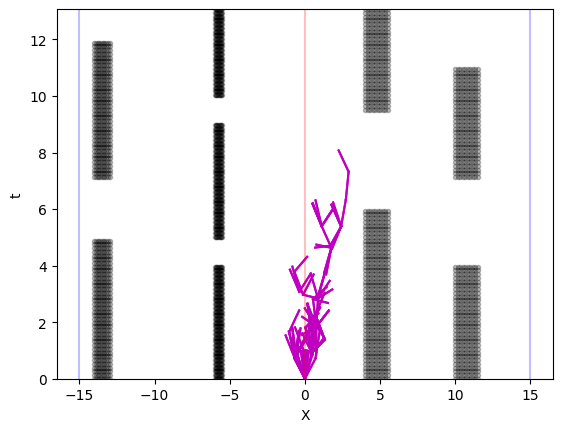

In [17]:
fig = plt.figure()
ax = fig.subplots()
# RRTstar
#for rrtv in V_RRTstar:
#    plt.plot(rrtv[0], rrtv[1], 'm.')
for rrte in E_RRTstar:
    plt.plot([rrte[0][0], rrte[1][0]], [rrte[0][1], rrte[1][1]], 'm-')#, alpha=0.25)

# Obstacle
tspace = np.linspace(0, max(T_RRTstar)+5, 100)
for xobsi in range(len(xobs)):
    xobs_this = xobs[xobsi]
    xspace = np.linspace(xobs_this[0], xobs_this[1], 10)
    for xi in xspace:
        for ti in tspace:
            if not obstacle_check(ti, obs_vec[xobsi]):
                plt.plot(xi, ti, 'k.', alpha=0.25)

# Initial/Final
plt.plot([x0, x0], [0, max(T_RRTstar)+5], 'r-', alpha=0.25)
for i in range(len(xf)):
    plt.plot([xf[i], xf[i]], [0, max(T_RRTstar)+5], 'b-', alpha=0.25)

# Plot Limits
#plt.xlim(xf[0]-1, xf[1]+1)
plt.ylim(0, max(T_RRTstar)+5)
plt.xlabel('X')
plt.ylabel('t')

In [18]:
save = False

if save:
    import pickle
        
    RRTstar_data = {}
    RRTstar_data['V'] = V_RRTstar
    RRTstar_data['E'] = E_RRTstar
    RRTstar_data['T'] = T_RRTstar

    with open("RRTstar", "wb") as fp:   #Pickling
        pickle.dump(RRTstar_data, fp)
    
    """with open("RRT", "rb") as fp:   # Unpickling
    b = pickle.load(fp)"""

In [19]:
def reachable_RRTC(q0, q1, k):
    dx = np.abs(q1[0]-q0[0])
    dt = q1[1]-q0[1]

    if dx == 0:
        return True
    else:
        """if np.mod(k,2) == 0:
            if dt > 0 and np.abs(dx/dt) <= vmax:
                return True
            else:
                return False
        else:
            if dt < 0 and np.abs(dx/dt) <= vmax:
                return True
            else:
                return False"""
        if np.abs(dx/dt) <= vmax:
            return True
        else:
            return False

In [20]:
def random_sample_RRTC(tf, k):
    while 1:
        check = rn.uniform(0, 1)
        trand = rn.uniform(1e-1, tf)
        if np.mod(k, 2) == 0:
            if check >= 0 and check < 0.9:
                xrand = rn.uniform(trand*(-vmax)+x0, trand*vmax+x0)
            else:
                xrand = xf[1]
        else:
            if check >= 0 and check < 0.9:
                xrand = rn.uniform(-(tf-trand)*vmax, (tf-trand)*vmax)+xf[1]
                trand = tf - trand
            else:
                xrand = x0
        qrand = [xrand, trand]
        if reachable_RRTC([x0, 0], qrand, k) and reachable_RRTC([xf[1], tf], qrand, k):
            break
    return qrand

In [21]:
def find_neighbor_RRTC(qrand, V, k):
    # Find neighbor
    dist_vec = []
    for i in range(len(V)):
        if reachable_RRTC(V[i], qrand, k):
            dist_vec.append(distance(V[i][0], qrand[0]))
    if len(dist_vec) > 0:
        closest = dist_vec.index(min(dist_vec))
        qclosest = V[closest]
        return qclosest
    else:
        return None

In [22]:
# Standard ST-RRT-Connect
tf = 20
V_RRTConnect = {}
E_RRTConnect = {}
kk = 0
K = 500
while 1:
    k = 0
    V_RRTCa = []
    V_RRTCa.append([x0, 0])
    V_RRTCb = []
    V_RRTCb.append([xf[1], tf])
    V_RRTCb_raw = []

    T_RRTCa = []
    T_RRTCb = []
    T_RRTCa.append(0)
    T_RRTCa.append(tf)

    E_RRTCa = []
    E_RRTCb = []

    while k < K:
        print('k: ', k)
        while 1:
            # Sample
            qrand = random_sample_RRTC(tf, k)
            if np.mod(k, 2) == 0:
                qclosest = find_neighbor_RRTC(qrand, V_RRTCa, k)
            else:
                qclosest = find_neighbor_RRTC(qrand, V_RRTCb, k)
                
            if qclosest is not None:
                qnew = extend(qclosest, qrand)
                    
                # Validate
                check_vec = validate(qnew)
                if np.sum(check_vec) == 0:
                    if check_route(qclosest, qnew):
                        break
        """print('V_RRTCb: ', V_RRTCb)
        print('qrand: ', qrand)
        print('qclosest: ', qclosest)
        print('dx, dt: ', qrand[0]-qclosest[0], qrand[1]-qclosest[1])
        print('slope: ', (qrand[0]-qclosest[0])/(qrand[1]-qclosest[1]))
        print('vmax: ', vmax)
        asdafasf"""

        # Add V, E
        if np.mod(k, 2) == 0:
            V_RRTCa.append(qnew)
            E_RRTCa.append([qclosest, qnew])
            T_RRTCa.append(qnew[1])
        else:
            V_RRTCb.append(qnew)
            E_RRTCb.append([qclosest, qnew])
            T_RRTCb.append(qnew[1])
            V_RRTCb_raw.append(qrand)
        k += 1

        # Check continue
        dist_check = []
        for i in range(len(xf)):
            if np.abs(distance(V_RRTCa[-1][0], V_RRTCb[-1][0])) <= 1:
                dist_check.append(1)
            else:
                dist_check.append(0)
        if np.sum(dist_check) > 0 or k > K:
            E_RRTCa.append([V_RRTCa[-1], V_RRTCb[-1]])
            break
    V_RRTConnect[str(kk)] = [V_RRTCa, V_RRTCb]
    E_RRTConnect[str(kk)] = [E_RRTCa, E_RRTCb]
    
    if tf >= 25:
        break
    tf += 5
    kk += 1

print(len(V_RRTCa))
print(len(V_RRTCb))

k:  0
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49
k:  50
k:  51
k:  52
k:  53
k:  54
k:  55
k:  56
k:  57
k:  58
k:  59
k:  60
k:  61
k:  62
k:  63
k:  64
k:  65
k:  66
k:  67
k:  68
k:  69
k:  70
k:  71
k:  72
k:  73
k:  74
k:  75
k:  76
k:  77
k:  78
k:  79
k:  80
k:  81
k:  82
k:  83
k:  84
k:  85
k:  86
k:  87
k:  88
k:  89
k:  90
k:  91
k:  92
k:  93
k:  94
k:  95
k:  96
k:  97
k:  98
k:  99
k:  100
k:  101
k:  102
k:  103
k:  104
k:  105
k:  106
k:  107
k:  108
k:  109
k:  110
k:  111
k:  112
k:  113
k:  114
k:  115
k:  116
k:  117
k:  118
k:  119
k:  120
k:  121
k:  122
k:  123
k:  124
k:  125
k:  126
k:  127
k:  128
k:  129
k:  130
k:  131
k:  132
k:  133
k:  134
k:  135
k:  136
k:  137
k:  13

Text(0, 0.5, 't')

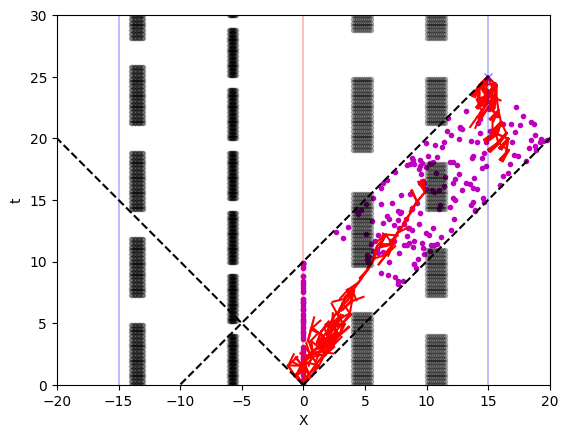

In [23]:
fig = plt.figure()
ax = fig.subplots()
# RRTConnect
#for rrtv in V_RRTCa:
#    plt.plot(rrtv[0], rrtv[1], 'm.')
#for rrtv in V_RRTCb:
#    plt.plot(rrtv[0], rrtv[1], 'm.')
for rrtvr in V_RRTCb_raw:
    plt.plot(rrtvr[0], rrtvr[1], 'm.')
for rrte in E_RRTCa:
    plt.plot([rrte[0][0], rrte[1][0]], [rrte[0][1], rrte[1][1]], 'r-')#, alpha=0.25)
for rrte in E_RRTCb:
    plt.plot([rrte[0][0], rrte[1][0]], [rrte[0][1], rrte[1][1]], 'r-')#, alpha=0.25)


# Obstacle
tspace = np.linspace(0, tf+5, 100)
for xobsi in range(len(xobs)):
    xobs_this = xobs[xobsi]
    xspace = np.linspace(xobs_this[0], xobs_this[1], 10)
    for xi in xspace:
        for ti in tspace:
            if not obstacle_check(ti, obs_vec[xobsi]):
                plt.plot(xi, ti, 'k.', alpha=0.25)

# Initial/Final
plt.plot([x0, x0], [0, tf+5], 'r-', alpha=0.25)
plt.plot(xf[1], tf, 'xb', alpha=0.5)
for i in range(len(xf)):
    plt.plot([xf[i], xf[i]], [0, tf+5], 'b-', alpha=0.25)

# ST-Bound
plt.plot([0, tf+5], [0, tf+5], '--k')
plt.plot([0, -(tf+5)], [0, tf+5], '--k')
plt.plot([-xf[1], xf[1]], [tf-2*xf[1], tf], '--k')
#plt.plot([xf[1], xf[1]+5], [tf-2*xf[1], tf], '--k')

# Plot Limits
ax.axis('square')
plt.xlim(xf[0]-5, xf[1]+5)
plt.ylim(0, tf+5)
plt.xlabel('X')
plt.ylabel('t')


In [24]:
# TODO
# 1. Do Monte-Carlo for 1000-times and record time for average length
# 2. Add in time-shadow effect on ST-RRT*